In [1]:
from huggingface_hub import login
from google.colab import userdata
from transformers import AutoTokenizer

In [3]:
HF_token = userdata.get("HF_TOKEN")
login( HF_token, add_to_git_credential = True)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Meta-Llama-3.3-8B', trust_remote_code=True)

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3.1-8B.
403 Client Error. (Request ID: Root=1-676e3116-27ada3d15fb2b8ff294eba79;285c3981-9ab6-4768-8aec-15caf346dc14)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3.1-8B/resolve/main/config.json.
Your request to access model meta-llama/Llama-3.1-8B has been rejected by the repo's authors.

In [ ]:
PHI3_MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct"
QWEN2_MODEL_NAME = "Qwen/Qwen2-7B-Instruct"
STARCODER2_MODEL_NAME = "bigcode/starcoder2-3b"

In [ ]:
text ="I am excited to show Tokenizers in action to my LLM engineers"
messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Tell a light-hearted joke for a room of Data Scientists"}
  ]

In [ ]:
pi_tokeniser = AutoTokenizer.from_pretrained (PHI3_MODEL_NAME)
print(pi_tokeniser.encode (text))

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

[306, 626, 24173, 304, 1510, 25159, 19427, 297, 3158, 304, 590, 365, 26369, 6012, 414]


In [ ]:
pi_tokeniser.apply_chat_template(messages,tokenize=False, add_genertion_promplt=True )

'<|system|>\nYou are a helpful assistant<|end|>\n<|user|>\nTell a light-hearted joke for a room of Data Scientists<|end|>\n<|endoftext|>'

# Source : Hands on Large Language Models (https://learning.oreilly.com/library/view/hands-on-large-language/9781098150952/ch02.html#how_tokenizers_prepare_the_inputs_to_th)

## What are Tokens and Embeddings

Words -> Token -> Embeddings -> Models

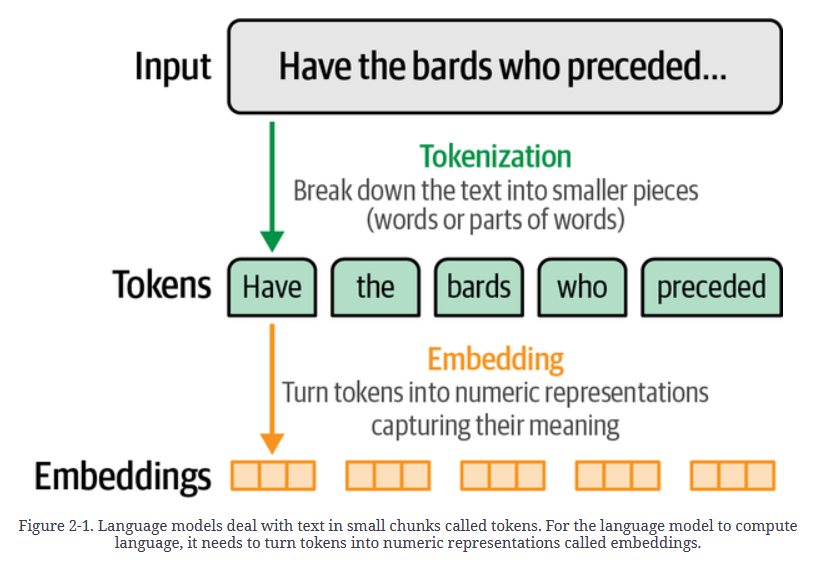

## LLM Tokenization


### Downloading and Running an LLM

In [8]:
from transformers import AutoModelForCausalLM, AutoTokenizer

#load model and Tokenizer

model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct", device_map="cuda", torch_dtype="auto", trust_remote_code= True)
tokeniser= AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [11]:
text ="Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|>"

#Tokenize the input
input_ids = tokeniser(text, return_tensors="pt").input_ids.to("cuda")

#Generate Text

generation_output = model.generate(input_ids= input_ids, max_new_tokens=500)



In [12]:
print(tokeniser.decode( generation_output[0]))

Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|> Subject: Sincere Apologies for the Gardening Mishap


Dear Sarah,


I hope this message finds you well. I am writing to express my deepest apologies for the unfortunate incident that occurred in your garden yesterday.


As you know, I have always admired the beauty and tranquility of your garden. It was with great disappointment that I witnessed the accidental damage caused to your beloved rose bushes. I understand how much effort and care you put into maintaining your garden, and it pains me to have caused any harm to it.


The mishap happened when I was attempting to prune the overgrown branches of the hedge. Unfortunately, in my haste, I misjudged the distance and accidentally struck the rose bushes with the shears. I realize now that I should have taken more time to assess the situation and proceed with greater caution.


Please know that I am fully committed to making amends 

In [14]:
print(input_ids)

tensor([[14350,   385,  4876, 27746,  5281,   304, 19235,   363,   278, 25305,
           293, 16423,   292,   286,   728,   481, 29889, 12027,  7420,   920,
           372,  9559, 29889, 32001]], device='cuda:0')


In [16]:
for id in input_ids[0]:
  print(tokeniser.decode(id))


Write
an
email
apolog
izing
to
Sarah
for
the
trag
ic
garden
ing
m
ish
ap
.
Exp
lain
how
it
happened
.
<|assistant|>


This is how the tokenizer broke down our input prompt. Notice the following:

    1. The first token is ID 1 (<s>), a special token indicating the beginning of
    2. Some tokens are parts of words (e.g., apolog, izing, trag, ic).
    3. Some tokens are complete words (e.g., Write, an, email).
    4. Punctuation characters are their own token.



Notice how the space character does not have its own token. Instead, partial tokens (like “izing” and “ic”) have a special hidden character at their beginning that indicates that they’re connected with the token that precedes them in the text. Tokens without that special character are assumed to have a space before them.

# How does the tokensier break down text
There are 3 major factors that dictate how the a tokeniser breaks down text

1.   **Model Design time **: which tokenization method is being used?
Poplular methods are:-

*   Byte Pair encoding (BPE) - used by GPT
*   WordPiece encoding (WPE) - used by BERT
Both the above methods are similar as they both try to optimise the efficient set of tokens to represent a text dataset, but they arrive at is differently.

2.   **Tokeniser Configurations**: Size of vocabulary size, what special token to use

3. **Training DataSet**: which is the best vocabulary to represent the datset? same method and config if trained on english will work differently thean if trained oncode or multilingual dataset

